In [18]:
#basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression    
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA


In [19]:
df = pd.read_csv('data/DJIA_table.csv')
dfCombined = pd.read_csv('data/Combined_News_DJIA_Prices.csv')
dfCombined.describe()

,Label,Open,High,Low,Close,Volume,Adj Close
count,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1.989000e+03,1989.000000
mean,0.535445,13459.116049,13541.303173,13372.931728,13463.032255,1.628110e+08,13463.032255
std,0.498867,3143.281634,3136.271725,3150.420934,3144.006996,9.392343e+07,3144.006996
min,0.000000,6547.009766,6709.609863,6469.950195,6547.049805,8.410000e+06,6547.049805
25%,0.000000,10907.339840,11000.980470,10824.759770,10913.379880,1.000000e+08,10913.379880
50%,1.000000,13022.049810,13088.110350,12953.129880,13025.580080,1.351700e+08,13025.580080
75%,1.000000,16477.699220,16550.070310,16392.769530,16478.410160,1.926000e+08,16478.410160
max,1.000000,18315.060550,18351.359380,18272.560550,18312.390630,6.749200e+08,18312.390630


In [20]:
def create_dataset(x_in, y_in, window=10 ):
    x = []
    y = []

    #print("x",x_in.shape,"y : ", y_in.shape[0])
    for i in range(window, x_in.shape[0]):
           x.append(x_in[i-window:i].flatten())
           y.append(y_in[i])  

    x = np.array(x)    
    y = np.array(y)    
    
    #print(x.shape, y.shape)
    return x,y

In [21]:
prices= dfCombined['Close'].values
y_arr = np.array(dfCombined['Label'])
train_per=0.1
window=5
dataset_train = np.array(prices[:int(prices.shape[0]*train_per)])
y_ex = np.array(y_arr[:int(y_arr.shape[0]*train_per)])



dataset_test = np.array(prices[int(prices.shape[0]*train_per)-window:])
y_ex2 = np.array(y_arr[int(y_arr.shape[0]*train_per)-window:])


x_train, y_train = create_dataset(dataset_train,y_ex,window)    
x_test, y_test = create_dataset(dataset_test,y_ex2,window)    
print(y_ex.shape)
print(int(y_arr.shape[0]*train_per)-window)
print((y_test.shape), y_arr.shape,y_ex2.shape)
print(x_train.shape, y_train.shape)
#for index in range(window,len(dataset_train)):
#    print(dataset_train[index],y_ex[index],prices[index],x_train[index-window],y_train[index-window])
for index in range(window,len(dataset_test)):
    print(dataset_test[index],y_ex2[index],
          prices[index+int(y_arr.shape[0]*train_per)-window],
          y_arr[index+int(y_arr.shape[0]*train_per)-window],
         # x_test[index-window],
          y_test[index-window])
    


(198,)
193
(1791,) (1989,) (1796,)
(193, 5) (193,)
8277.320312 0 8277.320312 0 0
8473.490234 1 8473.490234 1 1
8300.019531 0 8300.019531 0 0
8403.799805 1 8403.799805 1 1
8500.330078 1 8500.330078 1 1
8721.44043 1 8721.44043 1 1
8740.870117 1 8740.870117 1 1
8675.240234 0 8675.240234 0 0
8750.240234 1 8750.240234 1 1
8763.129883 1 8763.129883 1 1
8764.490234 1 8764.490234 1 1
8763.05957 0 8763.05957 0 0
8739.019531 0 8739.019531 0 0
8770.919922 1 8770.919922 1 1
8799.259766 1 8799.259766 1 1
8612.129883 0 8612.129883 0 0
8504.669922 0 8504.669922 0 0
8497.179688 0 8497.179688 0 0
8555.599609 1 8555.599609 1 1
8539.730469 0 8539.730469 0 0
8339.009766 0 8339.009766 0 0
8322.910156 0 8322.910156 0 0
8299.860352 0 8299.860352 0 0
8472.400391 1 8472.400391 1 1
8438.389648 0 8438.389648 0 0
8529.379883 1 8529.379883 1 1
8447.0 0 8447.0 0 0
8504.05957 1 8504.05957 1 1
8280.740234 0 8280.740234 0 0
8324.870117 1 8324.870117 1 1
8163.600098 0 8163.600098 0 0
8178.410156 1 8178.410156 1 1
8183.

11007.87988 0 11007.87988 0 0
11181.23047 1 11181.23047 1 1
11203.54981 1 11203.54981 1 1
11178.58008 0 11178.58008 0 0
11036.37012 0 11036.37012 0 0
11187.28027 1 11187.28027 1 1
11091.87012 0 11091.87012 0 0
11052.49023 0 11052.49023 0 0
11006.01953 0 11006.01953 0 0
11255.78027 1 11255.78027 1 1
11362.41016 1 11362.41016 1 1
11382.08984 1 11382.08984 1 1
11362.19043 0 11362.19043 0 0
11359.16016 0 11359.16016 0 0
11372.48047 1 11372.48047 1 1
11370.05957 0 11370.05957 0 0
11410.32031 1 11410.32031 1 1
11428.55957 1 11428.55957 1 1
11476.54004 1 11476.54004 1 1
11457.46973 0 11457.46973 0 0
11499.25 1 11499.25 1 1
11491.91016 0 11491.91016 0 0
11478.12988 0 11478.12988 0 0
11533.16016 1 11533.16016 1 1
11559.49023 1 11559.49023 1 1
11573.49023 1 11573.49023 1 1
11555.03027 0 11555.03027 0 0
11575.54004 1 11575.54004 1 1
11585.37988 1 11585.37988 1 1
11569.70996 0 11569.70996 0 0
11577.50977 1 11577.50977 1 1
11670.75 1 11670.75 1 1
11691.17969 1 11691.17969 1 1
11722.88965 1 11722.88

12815.08008 0 12815.08008 0 0
12756.17969 0 12756.17969 0 0
12570.9502 0 12570.9502 0 0
12542.37988 0 12542.37988 0 0
12588.30957 1 12588.30957 1 1
12795.95996 1 12795.95996 1 1
12788.50977 0 12788.50977 0 0
12836.88965 1 12836.88965 1 1
13009.53027 1 13009.53027 1 1
12967.37012 0 12967.37012 0 0
12878.12988 0 12878.12988 0 0
12985.11035 1 12985.11035 1 1
13021.82031 1 13021.82031 1 1
13025.58008 1 13025.58008 1 1
12965.59961 0 12965.59961 0 0
12951.78027 0 12951.78027 0 0
13034.49023 1 13034.49023 1 1
13074.04004 1 13074.04004 1 1
13155.12988 1 13155.12988 1 1
13169.87988 1 13169.87988 1 1
13248.44043 1 13248.44043 1 1
13245.4502 0 13245.4502 0 0
13170.71973 0 13170.71973 0 0
13135.00977 0 13135.00977 0 0
13235.38965 1 13235.38965 1 1
13350.95996 1 13350.95996 1 1
13251.96973 0 13251.96973 0 0
13311.71973 1 13311.71973 1 1
13190.83984 0 13190.83984 0 0
13138.92969 0 13138.92969 0 0
13114.58984 0 13114.58984 0 0
13096.30957 0 13096.30957 0 0
12938.11035 0 12938.11035 0 0
13104.13965 1 

17904.48047 1 17904.48047 1 1
17935.74023 1 17935.74023 1 1
18115.83984 1 18115.83984 1 1
18015.94922 0 18015.94922 0 0
18119.7793 1 18119.7793 1 1
18144.07031 1 18144.07031 1 1
17966.07031 0 17966.07031 0 0
17890.35938 0 17890.35938 0 0
17946.67969 1 17946.67969 1 1
17596.34961 0 17596.34961 0 0
17619.50977 1 17619.50977 1 1
17757.91016 1 17757.91016 1 1
17730.10938 0 17730.10938 0 0
17683.58008 0 17683.58008 0 0
17776.91016 1 17776.91016 1 1
17515.41992 0 17515.41992 0 0
17548.61914 1 17548.61914 1 1
17760.41016 1 17760.41016 1 1
17977.67969 1 17977.67969 1 1
18053.58008 1 18053.58008 1 1
18050.16992 0 18050.16992 0 0
18120.25 1 18120.25 1 1
18086.44922 0 18086.44922 0 0
18100.41016 1 18100.41016 1 1
17919.28906 0 17919.28906 0 0
17851.03906 0 17851.03906 0 0
17731.91992 0 17731.91992 0 0
17568.5293 0 17568.5293 0 0
17440.58984 0 17440.58984 0 0
17630.26953 1 17630.26953 1 1
17751.39063 1 17751.39063 1 1
17745.98047 0 17745.98047 0 0
17689.85938 0 17689.85938 0 0
17598.19922 0 17598.

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

In [29]:
#attribsSet = [['Close'],['Close','Volume'],['Close','Volume','High','Low']]
attribsSet = [['Close','Volume','High','Low']]
for attribIndex in range(0,len(attribsSet)):    
    closeVoldf = dfCombined[attribsSet[attribIndex]].values                                
    #train_percentages=[0.1,0.2,0.3,0.5,0.6,0.8]
    train_percentages=[0.2,0.5,0.7]
    window_sizes = [5,10,15,20,25,30,40,50,55,60,63,65,70,80,90,100,110,120,130,150]
    #window_sizes = range(5,205,5)
    modelList = []
    modelList.append(("LogisticReg",LogisticRegression(random_state=42)))
    modelList.append(("RandomForestClassifier",RandomForestClassifier(random_state=42)))
    modelList.append(("SVC",SVC(random_state=42)))
    modelList.append(("DecisionTreeClassifier",DecisionTreeClassifier(random_state=42)))
    modelList.append(("KNeighborsClassifier",KNeighborsClassifier(10)))
    modelList.append(("GaussianNB",GaussianNB()))
    modelList.append(("XGBClassifier",XGBClassifier()))
    modelList.append(("AdaBoostClassifier",AdaBoostClassifier()))
    
    ts_acc_best=-2.0
    best=[]
    results={}    
    y_arr = np.array(dfCombined['Label'])
    for train_per in train_percentages:            
        for window in window_sizes:
            #print(dataset_train.shape)
            #print(dataset_test.shape)


            dataset_train = np.array(closeVoldf[:int(closeVoldf.shape[0]*train_per)])
            y_train = np.array(y_arr[:int(y_arr.shape[0]*train_per)])
            dataset_test = np.array(closeVoldf[int(closeVoldf.shape[0]*train_per)-window:])
            y_test = np.array(y_arr[int(y_arr.shape[0]*train_per)-window:])

            min_max_scaler = MinMaxScaler(feature_range=(0,1))
            dataset_train = min_max_scaler.fit_transform(dataset_train)
            dataset_test = min_max_scaler.transform(dataset_test)

            #print(dataset_train.shape,y_train.shape)
            #print(dataset_test.shape,y_test.shape)

            x_train, y_train = create_dataset(dataset_train,y_train,window)
            x_test, y_test   = create_dataset(dataset_test,y_test,window)

            data={}
            for name, classifier in modelList:                                      
                classifier.fit(x_train,y_train)
                ytr_pred = classifier.predict(x_train)
                yts_pred = classifier.predict(x_test)

                tr_acc = accuracy_score(y_train,ytr_pred)
                ts_acc= accuracy_score(y_test,yts_pred)
               # data[name] = [attribsSet[attribIndex],tr_acc,ts_acc]
                print('Completed ',train_per,window,name,attribsSet[attribIndex]," Score[test]",ts_acc)
                if(ts_acc_best <= ts_acc) :
                    ts_acc_best = ts_acc
                    best = [train_per,window,name,attribsSet[attribIndex],'No PCA']
                    
                pca_final = PCA(0.90)
                df_train_pca = pca_final.fit_transform(x_train)
                df_test_pca = pca_final.transform(x_test)
                
                classifier.fit(df_train_pca,y_train)
                ytr_pred_pca = classifier.predict(df_train_pca)
                yts_pred_pca = classifier.predict(df_test_pca)
                tr_acc_pca = accuracy_score(y_train,ytr_pred_pca)
                ts_acc_pca = accuracy_score(y_test,yts_pred_pca)
                data[name] = [attribsSet[attribIndex],tr_acc,ts_acc,tr_acc_pca,ts_acc_pca]
                print('Completed with PCA with ',pca_final.n_components_,' components',train_per,window,name,attribsSet[attribIndex]," Score[test]",ts_acc_pca)
                if(ts_acc_best <= ts_acc_pca) :
                    ts_acc_best = ts_acc_pca
                    best = [train_per,window,name,attribsSet[attribIndex],'With PCA']
                
            if train_per in list(results.keys()):
                    mapTrainingPer = results[train_per]
                    mapTrainingPer.update({window:data})                    
            else:
                mapTrainingPer = {}
                mapTrainingPer.update({window:data})
                results.update({train_per:mapTrainingPer})   
            
            


Completed  0.2 5 LogisticReg ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5113065326633166
Completed with PCA with  2  components 0.2 5 LogisticReg ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5037688442211056
Completed  0.2 5 RandomForestClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.48680904522613067
Completed with PCA with  2  components 0.2 5 RandomForestClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.4842964824120603
Completed  0.2 5 SVC ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5383165829145728
Completed with PCA with  2  components 0.2 5 SVC ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5383165829145728
Completed  0.2 5 DecisionTreeClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5307788944723618
Completed with PCA with  2  components 0.2 5 DecisionTreeClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.47738693467336685
Completed  0.2 5 KNeighborsClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.47

Completed  0.2 25 XGBClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.4723618090452261
Completed with PCA with  5  components 0.2 25 XGBClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.46545226130653267
Completed  0.2 25 AdaBoostClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5150753768844221
Completed with PCA with  5  components 0.2 25 AdaBoostClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5012562814070352
Completed  0.2 30 LogisticReg ['Close', 'Volume', 'High', 'Low']  Score[test] 0.48932160804020103
Completed with PCA with  6  components 0.2 30 LogisticReg ['Close', 'Volume', 'High', 'Low']  Score[test] 0.48178391959798994
Completed  0.2 30 RandomForestClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5100502512562815
Completed with PCA with  6  components 0.2 30 RandomForestClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.4704773869346734
Completed  0.2 30 SVC ['Close', 'Volume', 'High', 'Low']  Score[test]

C:\Users\anagh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Completed  0.2 50 RandomForestClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.46984924623115576
Completed with PCA with  9  components 0.2 50 RandomForestClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.47675879396984927
Completed  0.2 50 SVC ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5383165829145728
Completed with PCA with  9  components 0.2 50 SVC ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5383165829145728
Completed  0.2 50 DecisionTreeClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5332914572864321
Completed with PCA with  9  components 0.2 50 DecisionTreeClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5113065326633166
Completed  0.2 50 KNeighborsClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.4667085427135678
Completed with PCA with  9  components 0.2 50 KNeighborsClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.4704773869346734
Completed  0.2 50 GaussianNB ['Close', 'Volume', 'High', 'Low'] 

C:\Users\anagh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Completed  0.2 60 RandomForestClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.47361809045226133
Completed with PCA with  11  components 0.2 60 RandomForestClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5025125628140703
Completed  0.2 60 SVC ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5383165829145728
Completed with PCA with  11  components 0.2 60 SVC ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5383165829145728
Completed  0.2 60 DecisionTreeClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5288944723618091
Completed with PCA with  11  components 0.2 60 DecisionTreeClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.49246231155778897
Completed  0.2 60 KNeighborsClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.4824120603015075
Completed with PCA with  11  components 0.2 60 KNeighborsClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.4780150753768844
Completed  0.2 60 GaussianNB ['Close', 'Volume', 'High', 'Lo

C:\Users\anagh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Completed  0.2 63 RandomForestClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.47110552763819097
Completed with PCA with  11  components 0.2 63 RandomForestClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5006281407035176
Completed  0.2 63 SVC ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5383165829145728
Completed with PCA with  11  components 0.2 63 SVC ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5383165829145728
Completed  0.2 63 DecisionTreeClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.503140703517588
Completed with PCA with  11  components 0.2 63 DecisionTreeClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.4849246231155779
Completed  0.2 63 KNeighborsClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5025125628140703
Completed with PCA with  11  components 0.2 63 KNeighborsClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.4886934673366834
Completed  0.2 63 GaussianNB ['Close', 'Volume', 'High', 'Low'

C:\Users\anagh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Completed  0.2 65 LogisticReg ['Close', 'Volume', 'High', 'Low']  Score[test] 0.49748743718592964
Completed with PCA with  11  components 0.2 65 LogisticReg ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5408291457286433
Completed  0.2 65 RandomForestClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.46796482412060303
Completed with PCA with  11  components 0.2 65 RandomForestClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5119346733668342
Completed  0.2 65 SVC ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5383165829145728
Completed with PCA with  11  components 0.2 65 SVC ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5383165829145728
Completed  0.2 65 DecisionTreeClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.4723618090452261
Completed with PCA with  11  components 0.2 65 DecisionTreeClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.49246231155778897
Completed  0.2 65 KNeighborsClassifier ['Close', 'Volume', 'High', 'Low']  Sc

C:\Users\anagh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Completed  0.2 70 RandomForestClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.4723618090452261
Completed with PCA with  12  components 0.2 70 RandomForestClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.49874371859296485
Completed  0.2 70 SVC ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5383165829145728
Completed with PCA with  12  components 0.2 70 SVC ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5383165829145728
Completed  0.2 70 DecisionTreeClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5307788944723618
Completed with PCA with  12  components 0.2 70 DecisionTreeClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.4886934673366834
Completed  0.2 70 KNeighborsClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5175879396984925
Completed with PCA with  12  components 0.2 70 KNeighborsClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5050251256281407
Completed  0.2 70 GaussianNB ['Close', 'Volume', 'High', 'Low

C:\Users\anagh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Completed  0.2 80 RandomForestClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5251256281407035
Completed with PCA with  12  components 0.2 80 RandomForestClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.4742462311557789
Completed  0.2 80 SVC ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5383165829145728
Completed with PCA with  12  components 0.2 80 SVC ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5383165829145728
Completed  0.2 80 DecisionTreeClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5389447236180904
Completed with PCA with  12  components 0.2 80 DecisionTreeClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.4780150753768844
Completed  0.2 80 KNeighborsClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5301507537688442
Completed with PCA with  12  components 0.2 80 KNeighborsClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.535175879396985
Completed  0.2 80 GaussianNB ['Close', 'Volume', 'High', 'Low']

C:\Users\anagh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Completed  0.2 90 RandomForestClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.4635678391959799
Completed with PCA with  14  components 0.2 90 RandomForestClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.4748743718592965
Completed  0.2 90 SVC ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5383165829145728
Completed with PCA with  14  components 0.2 90 SVC ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5383165829145728
Completed  0.2 90 DecisionTreeClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5244974874371859
Completed with PCA with  14  components 0.2 90 DecisionTreeClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5157035175879398
Completed  0.2 90 KNeighborsClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5295226130653267
Completed with PCA with  14  components 0.2 90 KNeighborsClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5376884422110553
Completed  0.2 90 GaussianNB ['Close', 'Volume', 'High', 'Low'

C:\Users\anagh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Completed  0.2 100 RandomForestClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5219849246231156
Completed with PCA with  14  components 0.2 100 RandomForestClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5018844221105527
Completed  0.2 100 SVC ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5383165829145728
Completed with PCA with  14  components 0.2 100 SVC ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5383165829145728
Completed  0.2 100 DecisionTreeClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5339195979899497
Completed with PCA with  14  components 0.2 100 DecisionTreeClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5062814070351759
Completed  0.2 100 KNeighborsClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5301507537688442
Completed with PCA with  14  components 0.2 100 KNeighborsClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5383165829145728
Completed  0.2 100 GaussianNB ['Close', 'Volume', 'Hig

C:\Users\anagh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Completed with PCA with  15  components 0.2 110 LogisticReg ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5326633165829145
Completed  0.2 110 RandomForestClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.47110552763819097
Completed with PCA with  15  components 0.2 110 RandomForestClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5439698492462312
Completed  0.2 110 SVC ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5383165829145728
Completed with PCA with  15  components 0.2 110 SVC ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5383165829145728
Completed  0.2 110 DecisionTreeClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5270100502512562
Completed with PCA with  15  components 0.2 110 DecisionTreeClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.47738693467336685
Completed  0.2 110 KNeighborsClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5244974874371859
Completed with PCA with  15  components 0.2 110 KNeighborsCla

C:\Users\anagh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Completed  0.2 120 RandomForestClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.46168341708542715
Completed with PCA with  16  components 0.2 120 RandomForestClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.48304020100502515
Completed  0.2 120 SVC ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5383165829145728
Completed with PCA with  16  components 0.2 120 SVC ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5383165829145728
Completed  0.2 120 DecisionTreeClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5301507537688442
Completed with PCA with  16  components 0.2 120 DecisionTreeClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.4704773869346734
Completed  0.2 120 KNeighborsClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5376884422110553
Completed with PCA with  16  components 0.2 120 KNeighborsClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5364321608040201
Completed  0.2 120 GaussianNB ['Close', 'Volume', 'H

C:\Users\anagh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Completed  0.2 130 RandomForestClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.47613065326633164
Completed with PCA with  16  components 0.2 130 RandomForestClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.47173366834170855
Completed  0.2 130 SVC ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5383165829145728
Completed with PCA with  16  components 0.2 130 SVC ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5383165829145728
Completed  0.2 130 DecisionTreeClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5270100502512562
Completed with PCA with  16  components 0.2 130 DecisionTreeClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.46796482412060303
Completed  0.2 130 KNeighborsClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5364321608040201
Completed with PCA with  16  components 0.2 130 KNeighborsClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5402010050251256
Completed  0.2 130 GaussianNB ['Close', 'Volume', '

C:\Users\anagh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Completed  0.2 150 LogisticReg ['Close', 'Volume', 'High', 'Low']  Score[test] 0.49120603015075376
Completed with PCA with  17  components 0.2 150 LogisticReg ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5069095477386935
Completed  0.2 150 RandomForestClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.4742462311557789
Completed with PCA with  17  components 0.2 150 RandomForestClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.4748743718592965
Completed  0.2 150 SVC ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5383165829145728
Completed with PCA with  17  components 0.2 150 SVC ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5383165829145728
Completed  0.2 150 DecisionTreeClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.48304020100502515
Completed with PCA with  17  components 0.2 150 DecisionTreeClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5213567839195979
Completed  0.2 150 KNeighborsClassifier ['Close', 'Volume', 'High', 'L

Completed  0.5 20 KNeighborsClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.46130653266331656
Completed with PCA with  1  components 0.5 20 KNeighborsClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.4653266331658292
Completed  0.5 20 GaussianNB ['Close', 'Volume', 'High', 'Low']  Score[test] 0.46331658291457284
Completed with PCA with  1  components 0.5 20 GaussianNB ['Close', 'Volume', 'High', 'Low']  Score[test] 0.46834170854271356
Completed  0.5 20 XGBClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.4824120603015075
Completed with PCA with  1  components 0.5 20 XGBClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.47035175879396984
Completed  0.5 20 AdaBoostClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.4623115577889447
Completed with PCA with  1  components 0.5 20 AdaBoostClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.46934673366834173
Completed  0.5 25 LogisticReg ['Close', 'Volume', 'High', 'Low']  Score[t

C:\Users\anagh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Completed  0.5 40 RandomForestClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.46733668341708545
Completed with PCA with  2  components 0.5 40 RandomForestClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.46030150753768845
Completed  0.5 40 SVC ['Close', 'Volume', 'High', 'Low']  Score[test] 0.46331658291457284
Completed with PCA with  2  components 0.5 40 SVC ['Close', 'Volume', 'High', 'Low']  Score[test] 0.4623115577889447
Completed  0.5 40 DecisionTreeClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5135678391959799
Completed with PCA with  2  components 0.5 40 DecisionTreeClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5115577889447236
Completed  0.5 40 KNeighborsClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.46331658291457284
Completed with PCA with  2  components 0.5 40 KNeighborsClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.46733668341708545
Completed  0.5 40 GaussianNB ['Close', 'Volume', 'High', 'Low

C:\Users\anagh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Completed  0.5 50 RandomForestClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.4964824120603015
Completed with PCA with  2  components 0.5 50 RandomForestClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.4653266331658292
Completed  0.5 50 SVC ['Close', 'Volume', 'High', 'Low']  Score[test] 0.46331658291457284
Completed with PCA with  2  components 0.5 50 SVC ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5025125628140703
Completed  0.5 50 DecisionTreeClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5206030150753769
Completed with PCA with  2  components 0.5 50 DecisionTreeClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.4663316582914573
Completed  0.5 50 KNeighborsClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.464321608040201
Completed with PCA with  2  components 0.5 50 KNeighborsClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.464321608040201
Completed  0.5 50 GaussianNB ['Close', 'Volume', 'High', 'Low']  Sc

C:\Users\anagh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Completed  0.5 55 RandomForestClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.46130653266331656
Completed with PCA with  2  components 0.5 55 RandomForestClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.46331658291457284
Completed  0.5 55 SVC ['Close', 'Volume', 'High', 'Low']  Score[test] 0.47035175879396984
Completed with PCA with  2  components 0.5 55 SVC ['Close', 'Volume', 'High', 'Low']  Score[test] 0.4984924623115578
Completed  0.5 55 DecisionTreeClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.4763819095477387
Completed with PCA with  2  components 0.5 55 DecisionTreeClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5065326633165829
Completed  0.5 55 KNeighborsClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.464321608040201
Completed with PCA with  2  components 0.5 55 KNeighborsClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.4653266331658292
Completed  0.5 55 GaussianNB ['Close', 'Volume', 'High', 'Low'] 

C:\Users\anagh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Completed  0.5 60 RandomForestClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.4914572864321608
Completed with PCA with  2  components 0.5 60 RandomForestClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.46130653266331656
Completed  0.5 60 SVC ['Close', 'Volume', 'High', 'Low']  Score[test] 0.46934673366834173
Completed with PCA with  2  components 0.5 60 SVC ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5015075376884423
Completed  0.5 60 DecisionTreeClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.4814070351758794
Completed with PCA with  2  components 0.5 60 DecisionTreeClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5115577889447236
Completed  0.5 60 KNeighborsClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.4663316582914573
Completed with PCA with  2  components 0.5 60 KNeighborsClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.46331658291457284
Completed  0.5 60 GaussianNB ['Close', 'Volume', 'High', 'Low']

C:\Users\anagh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Completed  0.5 63 RandomForestClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5005025125628141
Completed with PCA with  2  components 0.5 63 RandomForestClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.4663316582914573
Completed  0.5 63 SVC ['Close', 'Volume', 'High', 'Low']  Score[test] 0.4834170854271357
Completed with PCA with  2  components 0.5 63 SVC ['Close', 'Volume', 'High', 'Low']  Score[test] 0.4984924623115578
Completed  0.5 63 DecisionTreeClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.4844221105527638
Completed with PCA with  2  components 0.5 63 DecisionTreeClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5095477386934674
Completed  0.5 63 KNeighborsClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.464321608040201
Completed with PCA with  2  components 0.5 63 KNeighborsClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.4623115577889447
Completed  0.5 63 GaussianNB ['Close', 'Volume', 'High', 'Low']  Sc

C:\Users\anagh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Completed  0.5 65 LogisticReg ['Close', 'Volume', 'High', 'Low']  Score[test] 0.48542713567839196
Completed with PCA with  2  components 0.5 65 LogisticReg ['Close', 'Volume', 'High', 'Low']  Score[test] 0.49748743718592964
Completed  0.5 65 RandomForestClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.528643216080402
Completed with PCA with  2  components 0.5 65 RandomForestClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.464321608040201
Completed  0.5 65 SVC ['Close', 'Volume', 'High', 'Low']  Score[test] 0.4743718592964824
Completed with PCA with  2  components 0.5 65 SVC ['Close', 'Volume', 'High', 'Low']  Score[test] 0.4984924623115578
Completed  0.5 65 DecisionTreeClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.47537688442211057
Completed with PCA with  2  components 0.5 65 DecisionTreeClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5175879396984925
Completed  0.5 65 KNeighborsClassifier ['Close', 'Volume', 'High', 'Low']  Score[te

C:\Users\anagh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Completed  0.5 70 RandomForestClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.4864321608040201
Completed with PCA with  2  components 0.5 70 RandomForestClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.4663316582914573
Completed  0.5 70 SVC ['Close', 'Volume', 'High', 'Low']  Score[test] 0.4834170854271357
Completed with PCA with  2  components 0.5 70 SVC ['Close', 'Volume', 'High', 'Low']  Score[test] 0.4994974874371859
Completed  0.5 70 DecisionTreeClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.4844221105527638
Completed with PCA with  2  components 0.5 70 DecisionTreeClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.471356783919598
Completed  0.5 70 KNeighborsClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.464321608040201
Completed with PCA with  2  components 0.5 70 KNeighborsClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.4663316582914573
Completed  0.5 70 GaussianNB ['Close', 'Volume', 'High', 'Low']  Sco

C:\Users\anagh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Completed  0.5 80 LogisticReg ['Close', 'Volume', 'High', 'Low']  Score[test] 0.46733668341708545
Completed with PCA with  2  components 0.5 80 LogisticReg ['Close', 'Volume', 'High', 'Low']  Score[test] 0.4904522613065327
Completed  0.5 80 RandomForestClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.521608040201005
Completed with PCA with  2  components 0.5 80 RandomForestClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.4653266331658292
Completed  0.5 80 SVC ['Close', 'Volume', 'High', 'Low']  Score[test] 0.46331658291457284
Completed with PCA with  2  components 0.5 80 SVC ['Close', 'Volume', 'High', 'Low']  Score[test] 0.49547738693467336
Completed  0.5 80 DecisionTreeClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5306532663316583
Completed with PCA with  2  components 0.5 80 DecisionTreeClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.464321608040201
Completed  0.5 80 KNeighborsClassifier ['Close', 'Volume', 'High', 'Low']  Score[te

C:\Users\anagh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Completed  0.5 90 LogisticReg ['Close', 'Volume', 'High', 'Low']  Score[test] 0.4723618090452261
Completed with PCA with  2  components 0.5 90 LogisticReg ['Close', 'Volume', 'High', 'Low']  Score[test] 0.4934673366834171
Completed  0.5 90 RandomForestClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5376884422110553
Completed with PCA with  2  components 0.5 90 RandomForestClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.471356783919598
Completed  0.5 90 SVC ['Close', 'Volume', 'High', 'Low']  Score[test] 0.46331658291457284
Completed with PCA with  2  components 0.5 90 SVC ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5005025125628141
Completed  0.5 90 DecisionTreeClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5246231155778894
Completed with PCA with  2  components 0.5 90 DecisionTreeClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.46733668341708545
Completed  0.5 90 KNeighborsClassifier ['Close', 'Volume', 'High', 'Low']  Score[te

C:\Users\anagh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Completed  0.5 100 LogisticReg ['Close', 'Volume', 'High', 'Low']  Score[test] 0.4844221105527638
Completed with PCA with  2  components 0.5 100 LogisticReg ['Close', 'Volume', 'High', 'Low']  Score[test] 0.48743718592964824
Completed  0.5 100 RandomForestClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.471356783919598
Completed with PCA with  2  components 0.5 100 RandomForestClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.464321608040201
Completed  0.5 100 SVC ['Close', 'Volume', 'High', 'Low']  Score[test] 0.46331658291457284
Completed with PCA with  2  components 0.5 100 SVC ['Close', 'Volume', 'High', 'Low']  Score[test] 0.49748743718592964
Completed  0.5 100 DecisionTreeClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5366834170854271
Completed with PCA with  2  components 0.5 100 DecisionTreeClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.4864321608040201
Completed  0.5 100 KNeighborsClassifier ['Close', 'Volume', 'High', 'Low'] 

C:\Users\anagh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Completed  0.5 110 LogisticReg ['Close', 'Volume', 'High', 'Low']  Score[test] 0.46733668341708545
Completed with PCA with  3  components 0.5 110 LogisticReg ['Close', 'Volume', 'High', 'Low']  Score[test] 0.4623115577889447
Completed  0.5 110 RandomForestClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5165829145728643
Completed with PCA with  3  components 0.5 110 RandomForestClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.457286432160804
Completed  0.5 110 SVC ['Close', 'Volume', 'High', 'Low']  Score[test] 0.457286432160804
Completed with PCA with  3  components 0.5 110 SVC ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5025125628140703
Completed  0.5 110 DecisionTreeClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5236180904522613
Completed with PCA with  3  components 0.5 110 DecisionTreeClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5316582914572864
Completed  0.5 110 KNeighborsClassifier ['Close', 'Volume', 'High', 'Low']  S

C:\Users\anagh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Completed  0.5 120 LogisticReg ['Close', 'Volume', 'High', 'Low']  Score[test] 0.471356783919598
Completed with PCA with  3  components 0.5 120 LogisticReg ['Close', 'Volume', 'High', 'Low']  Score[test] 0.4663316582914573
Completed  0.5 120 RandomForestClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.528643216080402
Completed with PCA with  3  components 0.5 120 RandomForestClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.528643216080402
Completed  0.5 120 SVC ['Close', 'Volume', 'High', 'Low']  Score[test] 0.46331658291457284
Completed with PCA with  3  components 0.5 120 SVC ['Close', 'Volume', 'High', 'Low']  Score[test] 0.4984924623115578
Completed  0.5 120 DecisionTreeClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5437185929648242
Completed with PCA with  3  components 0.5 120 DecisionTreeClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5206030150753769
Completed  0.5 120 KNeighborsClassifier ['Close', 'Volume', 'High', 'Low']  Sc

C:\Users\anagh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Completed  0.5 130 LogisticReg ['Close', 'Volume', 'High', 'Low']  Score[test] 0.46934673366834173
Completed with PCA with  3  components 0.5 130 LogisticReg ['Close', 'Volume', 'High', 'Low']  Score[test] 0.46733668341708545
Completed  0.5 130 RandomForestClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5256281407035176
Completed with PCA with  3  components 0.5 130 RandomForestClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5145728643216081
Completed  0.5 130 SVC ['Close', 'Volume', 'High', 'Low']  Score[test] 0.4592964824120603
Completed with PCA with  3  components 0.5 130 SVC ['Close', 'Volume', 'High', 'Low']  Score[test] 0.4984924623115578
Completed  0.5 130 DecisionTreeClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5346733668341709
Completed with PCA with  3  components 0.5 130 DecisionTreeClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.47035175879396984
Completed  0.5 130 KNeighborsClassifier ['Close', 'Volume', 'High', 'Low'

C:\Users\anagh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Completed  0.5 150 LogisticReg ['Close', 'Volume', 'High', 'Low']  Score[test] 0.4653266331658292
Completed with PCA with  3  components 0.5 150 LogisticReg ['Close', 'Volume', 'High', 'Low']  Score[test] 0.46733668341708545
Completed  0.5 150 RandomForestClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5025125628140703
Completed with PCA with  3  components 0.5 150 RandomForestClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.542713567839196
Completed  0.5 150 SVC ['Close', 'Volume', 'High', 'Low']  Score[test] 0.4994974874371859
Completed with PCA with  3  components 0.5 150 SVC ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5025125628140703
Completed  0.5 150 DecisionTreeClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5306532663316583
Completed with PCA with  3  components 0.5 150 DecisionTreeClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.47839195979899496
Completed  0.5 150 KNeighborsClassifier ['Close', 'Volume', 'High', 'Low'] 

Completed  0.7 20 KNeighborsClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.47571189279731996
Completed with PCA with  1  components 0.7 20 KNeighborsClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.47068676716917923
Completed  0.7 20 GaussianNB ['Close', 'Volume', 'High', 'Low']  Score[test] 0.46901172529313234
Completed with PCA with  1  components 0.7 20 GaussianNB ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5443886097152428
Completed  0.7 20 XGBClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.4824120603015075
Completed with PCA with  1  components 0.7 20 XGBClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.47068676716917923
Completed  0.7 20 AdaBoostClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.48408710217755446
Completed with PCA with  1  components 0.7 20 AdaBoostClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.47068676716917923
Completed  0.7 25 LogisticReg ['Close', 'Volume', 'High', 'Low']  Score[

C:\Users\anagh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Completed  0.7 40 RandomForestClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.474036850921273
Completed with PCA with  1  components 0.7 40 RandomForestClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.474036850921273
Completed  0.7 40 SVC ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5343383584589615
Completed with PCA with  1  components 0.7 40 SVC ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5309882747068677
Completed  0.7 40 DecisionTreeClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.4639865996649916
Completed with PCA with  1  components 0.7 40 DecisionTreeClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.474036850921273
Completed  0.7 40 KNeighborsClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.47068676716917923
Completed with PCA with  1  components 0.7 40 KNeighborsClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.46901172529313234
Completed  0.7 40 GaussianNB ['Close', 'Volume', 'High', 'Low']  Sc

C:\Users\anagh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Completed with PCA with  1  components 0.7 50 LogisticReg ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5309882747068677
Completed  0.7 50 RandomForestClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.48408710217755446
Completed with PCA with  1  components 0.7 50 RandomForestClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.4723618090452261
Completed  0.7 50 SVC ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5326633165829145
Completed with PCA with  1  components 0.7 50 SVC ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5309882747068677
Completed  0.7 50 DecisionTreeClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.48576214405360135
Completed with PCA with  1  components 0.7 50 DecisionTreeClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.4723618090452261
Completed  0.7 50 KNeighborsClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.47068676716917923
Completed with PCA with  1  components 0.7 50 KNeighborsClassifier ['Clo

C:\Users\anagh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Completed  0.7 55 RandomForestClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.474036850921273
Completed with PCA with  1  components 0.7 55 RandomForestClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.4723618090452261
Completed  0.7 55 SVC ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5309882747068677
Completed with PCA with  1  components 0.7 55 SVC ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5309882747068677
Completed  0.7 55 DecisionTreeClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.48743718592964824
Completed with PCA with  1  components 0.7 55 DecisionTreeClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.4723618090452261
Completed  0.7 55 KNeighborsClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.4656616415410385
Completed with PCA with  1  components 0.7 55 KNeighborsClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.47068676716917923
Completed  0.7 55 GaussianNB ['Close', 'Volume', 'High', 'Low']  

C:\Users\anagh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Completed with PCA with  1  components 0.7 60 LogisticReg ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5309882747068677
Completed  0.7 60 RandomForestClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.525963149078727
Completed with PCA with  1  components 0.7 60 RandomForestClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.4656616415410385
Completed  0.7 60 SVC ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5293132328308208
Completed with PCA with  1  components 0.7 60 SVC ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5309882747068677
Completed  0.7 60 DecisionTreeClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.47571189279731996
Completed with PCA with  1  components 0.7 60 DecisionTreeClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.4656616415410385
Completed  0.7 60 KNeighborsClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.4807370184254606
Completed with PCA with  1  components 0.7 60 KNeighborsClassifier ['Close'

C:\Users\anagh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Completed  0.7 63 RandomForestClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.4807370184254606
Completed with PCA with  1  components 0.7 63 RandomForestClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.46901172529313234
Completed  0.7 63 SVC ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5309882747068677
Completed with PCA with  1  components 0.7 63 SVC ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5309882747068677
Completed  0.7 63 DecisionTreeClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.4623115577889447
Completed with PCA with  1  components 0.7 63 DecisionTreeClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.46901172529313234
Completed  0.7 63 KNeighborsClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.48911222780569513
Completed with PCA with  1  components 0.7 63 KNeighborsClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.46901172529313234
Completed  0.7 63 GaussianNB ['Close', 'Volume', 'High', 'Low'

C:\Users\anagh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Completed with PCA with  1  components 0.7 65 LogisticReg ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5309882747068677
Completed  0.7 65 RandomForestClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.474036850921273
Completed with PCA with  1  components 0.7 65 RandomForestClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.46901172529313234
Completed  0.7 65 SVC ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5309882747068677
Completed with PCA with  1  components 0.7 65 SVC ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5309882747068677
Completed  0.7 65 DecisionTreeClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.48408710217755446
Completed with PCA with  1  components 0.7 65 DecisionTreeClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.46901172529313234
Completed  0.7 65 KNeighborsClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.48576214405360135
Completed with PCA with  1  components 0.7 65 KNeighborsClassifier ['Clo

C:\Users\anagh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Completed  0.7 70 LogisticReg ['Close', 'Volume', 'High', 'Low']  Score[test] 0.49748743718592964
Completed with PCA with  1  components 0.7 70 LogisticReg ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5309882747068677
Completed  0.7 70 RandomForestClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.49581239530988275
Completed with PCA with  1  components 0.7 70 RandomForestClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.46901172529313234
Completed  0.7 70 SVC ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5309882747068677
Completed with PCA with  1  components 0.7 70 SVC ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5309882747068677
Completed  0.7 70 DecisionTreeClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5175879396984925
Completed with PCA with  1  components 0.7 70 DecisionTreeClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.46901172529313234
Completed  0.7 70 KNeighborsClassifier ['Close', 'Volume', 'High', 'Low']  Score

C:\Users\anagh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Completed  0.7 80 LogisticReg ['Close', 'Volume', 'High', 'Low']  Score[test] 0.48743718592964824
Completed with PCA with  1  components 0.7 80 LogisticReg ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5309882747068677
Completed  0.7 80 RandomForestClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.47906197654941374
Completed with PCA with  1  components 0.7 80 RandomForestClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.46901172529313234
Completed  0.7 80 SVC ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5309882747068677
Completed with PCA with  1  components 0.7 80 SVC ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5309882747068677
Completed  0.7 80 DecisionTreeClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.47068676716917923
Completed with PCA with  1  components 0.7 80 DecisionTreeClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.46901172529313234
Completed  0.7 80 KNeighborsClassifier ['Close', 'Volume', 'High', 'Low']  Scor

C:\Users\anagh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Completed  0.7 90 LogisticReg ['Close', 'Volume', 'High', 'Low']  Score[test] 0.47906197654941374
Completed with PCA with  1  components 0.7 90 LogisticReg ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5309882747068677
Completed  0.7 90 RandomForestClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.47571189279731996
Completed with PCA with  1  components 0.7 90 RandomForestClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.46901172529313234
Completed  0.7 90 SVC ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5309882747068677
Completed with PCA with  1  components 0.7 90 SVC ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5309882747068677
Completed  0.7 90 DecisionTreeClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.4824120603015075
Completed with PCA with  1  components 0.7 90 DecisionTreeClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.46901172529313234
Completed  0.7 90 KNeighborsClassifier ['Close', 'Volume', 'High', 'Low']  Score

C:\Users\anagh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Completed  0.7 100 LogisticReg ['Close', 'Volume', 'High', 'Low']  Score[test] 0.4807370184254606
Completed with PCA with  2  components 0.7 100 LogisticReg ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5041876046901173
Completed  0.7 100 RandomForestClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.48743718592964824
Completed with PCA with  2  components 0.7 100 RandomForestClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.46901172529313234
Completed  0.7 100 SVC ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5309882747068677
Completed with PCA with  2  components 0.7 100 SVC ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5309882747068677
Completed  0.7 100 DecisionTreeClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5293132328308208
Completed with PCA with  2  components 0.7 100 DecisionTreeClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.48576214405360135
Completed  0.7 100 KNeighborsClassifier ['Close', 'Volume', 'High', 'Low'

C:\Users\anagh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Completed  0.7 110 LogisticReg ['Close', 'Volume', 'High', 'Low']  Score[test] 0.490787269681742
Completed with PCA with  2  components 0.7 110 LogisticReg ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5008375209380235
Completed  0.7 110 RandomForestClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5209380234505863
Completed with PCA with  2  components 0.7 110 RandomForestClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.46733668341708545
Completed  0.7 110 SVC ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5309882747068677
Completed with PCA with  2  components 0.7 110 SVC ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5309882747068677
Completed  0.7 110 DecisionTreeClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5309882747068677
Completed with PCA with  2  components 0.7 110 DecisionTreeClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.46901172529313234
Completed  0.7 110 KNeighborsClassifier ['Close', 'Volume', 'High', 'Low'] 

C:\Users\anagh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Completed  0.7 120 LogisticReg ['Close', 'Volume', 'High', 'Low']  Score[test] 0.47738693467336685
Completed with PCA with  2  components 0.7 120 LogisticReg ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5025125628140703
Completed  0.7 120 RandomForestClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.4723618090452261
Completed with PCA with  2  components 0.7 120 RandomForestClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.47068676716917923
Completed  0.7 120 SVC ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5309882747068677
Completed with PCA with  2  components 0.7 120 SVC ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5309882747068677
Completed  0.7 120 DecisionTreeClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5293132328308208
Completed with PCA with  2  components 0.7 120 DecisionTreeClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.46901172529313234
Completed  0.7 120 KNeighborsClassifier ['Close', 'Volume', 'High', 'Low'

C:\Users\anagh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Completed with PCA with  2  components 0.7 130 LogisticReg ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5025125628140703
Completed  0.7 130 RandomForestClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5159128978224455
Completed with PCA with  2  components 0.7 130 RandomForestClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.46901172529313234
Completed  0.7 130 SVC ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5309882747068677
Completed with PCA with  2  components 0.7 130 SVC ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5309882747068677
Completed  0.7 130 DecisionTreeClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5293132328308208
Completed with PCA with  2  components 0.7 130 DecisionTreeClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.4639865996649916
Completed  0.7 130 KNeighborsClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5192629815745393
Completed with PCA with  2  components 0.7 130 KNeighborsClassifie

C:\Users\anagh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Completed  0.7 150 LogisticReg ['Close', 'Volume', 'High', 'Low']  Score[test] 0.49246231155778897
Completed with PCA with  2  components 0.7 150 LogisticReg ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5460636515912898
Completed  0.7 150 RandomForestClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.4639865996649916
Completed with PCA with  2  components 0.7 150 RandomForestClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.52428810720268
Completed  0.7 150 SVC ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5309882747068677
Completed with PCA with  2  components 0.7 150 SVC ['Close', 'Volume', 'High', 'Low']  Score[test] 0.5309882747068677
Completed  0.7 150 DecisionTreeClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.509212730318258
Completed with PCA with  2  components 0.7 150 DecisionTreeClassifier ['Close', 'Volume', 'High', 'Low']  Score[test] 0.4656616415410385
Completed  0.7 150 KNeighborsClassifier ['Close', 'Volume', 'High', 'Low']  Sc

In [30]:
print("TrainPer","WnidowSize","Classifier","Attribs","TrainAcc","TestAcc","TrainAccWithPCA","TestAccWithPCA")
for train_per in results.keys():
    for window in results[train_per].keys():
        for clasf in results[train_per][window].keys():
            data = results[train_per][window][clasf]            
            if data[2] > 0.54 or data[4]  > 0.54:
                print(train_per, window, clasf,data)
                
print("Best: ",best, "Accuracy ",ts_acc_best)        

TrainPer WnidowSize Classifier Attribs TrainAcc TestAcc TrainAccWithPCA TestAccWithPCA
0.2 10 SVC [['Close', 'Volume', 'High', 'Low'], 0.5762273901808785, 0.5389447236180904, 0.5607235142118863, 0.5402010050251256]
0.2 60 LogisticReg [['Close', 'Volume', 'High', 'Low'], 0.7002967359050445, 0.5332914572864321, 0.5816023738872403, 0.5402010050251256]
0.2 63 LogisticReg [['Close', 'Volume', 'High', 'Low'], 0.6976047904191617, 0.5069095477386935, 0.5658682634730539, 0.5408291457286433]
0.2 65 LogisticReg [['Close', 'Volume', 'High', 'Low'], 0.6957831325301205, 0.49748743718592964, 0.5692771084337349, 0.5408291457286433]
0.2 80 LogisticReg [['Close', 'Volume', 'High', 'Low'], 0.7381703470031545, 0.48932160804020103, 0.5772870662460567, 0.5402010050251256]
0.2 80 AdaBoostClassifier [['Close', 'Volume', 'High', 'Low'], 0.9621451104100947, 0.5402010050251256, 0.8138801261829653, 0.5238693467336684]
0.2 100 AdaBoostClassifier [['Close', 'Volume', 'High', 'Low'], 0.9696969696969697, 0.5414572864

In [49]:
#creating samples from the testing/training dataset
def create_dataset_reg(x_in, price, label, window=10):
    x = []
    y = []
    z = []
    
    for i in range(window, x_in.shape[0]):        
        x.append(x_in[i-window:i].flatten())
        y.append(price[i])
        z.append(label[i])  
    x = np.array(x)
    y = np.array(y)
    z = np.array(z)
    return x,y,z

In [50]:
def direction(price_tplusone, price_t):
    if price_tplusone > price_t :
        return 1
    return 0

In [51]:
def accuracy_of_direction(y_predicted, label_test):                
                label_predicted = []            
                for index in range(1,len(y_predicted)):
                     label_predicted.append(direction(y_predicted[index], y_predicted[index-1]))
                label_predicted.append(direction(y_predicted[len(y_predicted)-1],y_predicted[len(y_predicted)-2]))
                ts_acc_pca = accuracy_score(label_test,label_predicted)
                return ts_acc_pca

In [48]:
#attribsSet = [['Close'],['Close','Volume'],['Close','Volume','High','Low']]
attribsSet = [['Close','Volume','High','Low']]
ts_acc_best=-2.0
best=[]
resultsReg={}
for attribIndex in range(0,len(attribsSet)):    
    closeVoldf = dfCombined[attribsSet[attribIndex]].values                                
    train_percentages=[0.1,0.2,0.5,0.6,0.8]
    #train_percentages=[0.1]
    #window_sizes = [10]
    window_sizes = [10,15,20,25,30,35,40,45,50,55,57,60,63,65,70,75,80,90,100,110,120,130,140,150]
    #window_sizes = range(5,180,5)
    modelList = []
    modelList.append(("LinearRegression",LinearRegression()))
    
    
    ts_acc_best=-2.0
    best=[]
    results={}    
    price_arr = np.array(dfCombined['Close'])
    z_arr = np.array(dfCombined['Label'])
    
    for train_per in train_percentages:            
        for window in window_sizes:
            
            dataset_train = np.array(closeVoldf[:int(closeVoldf.shape[0]*train_per)])
            price_arr_train = np.array(price_arr[:int(price_arr.shape[0]*train_per)])
            z_arr_train = np.array(z_arr[:int(z_arr.shape[0]*train_per)])
            
            dataset_test = np.array(closeVoldf[int(closeVoldf.shape[0]*train_per)-window:])
            price_arr_test = np.array(price_arr[int(price_arr.shape[0]*train_per)-window:])
            z_arr_test = np.array(z_arr[int(z_arr.shape[0]*train_per)-window:])
            
            price_arr_train = price_arr_train.reshape(-1,1)
            price_arr_test = price_arr_test.reshape(-1,1)

            min_max_scaler = MinMaxScaler(feature_range=(0,1))
            dataset_train = min_max_scaler.fit_transform(dataset_train)
            price_arr_train = MinMaxScaler(feature_range=(0,1)).fit_transform(price_arr_train)
            dataset_test = min_max_scaler.fit_transform(dataset_test)
            price_arr_test = MinMaxScaler(feature_range=(0,1)).fit_transform(price_arr_test)
            
            
            x_train, price_train, label_train = create_dataset_reg(dataset_train, price_arr_train, z_arr_train,window)
            x_test, price_test, label_test = create_dataset_reg(dataset_test, price_arr_test, z_arr_test,window)
            
            data={}
            for name, regression in modelList: 
                
                regression.fit(x_train,price_train)            
                y_pred_test = regression.predict(x_test)                                
                ts_acc = accuracy_of_direction(y_pred_test,label_test)

                if(ts_acc_best <= ts_acc) :
                        ts_acc_best = ts_acc
                        best = [train_per,window,attribsSet[attribIndex],'No PCA']

                pca_final = PCA(0.90)
                df_train_pca = pca_final.fit_transform(x_train)
                df_test_pca = pca_final.transform(x_test)


                regression.fit(df_train_pca,price_train)            
                y_pred_test_pca = regression.predict(df_test_pca)               
                ts_acc_pca = accuracy_of_direction(y_pred_test_pca,label_test)

                if(ts_acc_best <= ts_acc_pca) :
                        ts_acc_best = ts_acc_pca
                        best = [train_per,window,attribsSet[attribIndex],'No PCA']


                data[name]=[attribsSet[attribIndex],ts_acc,ts_acc_pca]
                if train_per in list(resultsReg.keys()):
                          mapTrainingPer = resultsReg[train_per]
                          mapTrainingPer.update({window:data})                    
                else:
                      mapTrainingPer = {}
                      mapTrainingPer.update({window:data})
                      resultsReg.update({train_per:mapTrainingPer})   
                print('Completed ',name,attribsSet[attribIndex],train_per,window,'Acc ',ts_acc,'Acc PCA components ',pca_final.n_components_,ts_acc_pca)
            
print('Best ',best,'Acc',ts_acc_best)  
print(resultsReg)

Completed  LinearRegression ['Close', 'Volume', 'High', 'Low'] 0.1 10 Acc  0.7079843662758235 Acc PCA components  3 0.5767727526521497
Completed  LinearRegression ['Close', 'Volume', 'High', 'Low'] 0.1 15 Acc  0.6605248464544947 Acc PCA components  4 0.5661641541038526
Completed  LinearRegression ['Close', 'Volume', 'High', 'Low'] 0.1 20 Acc  0.6286990508096035 Acc PCA components  5 0.5834729201563372
Completed  LinearRegression ['Close', 'Volume', 'High', 'Low'] 0.1 25 Acc  0.6035734226689 Acc PCA components  7 0.5812395309882747
Completed  LinearRegression ['Close', 'Volume', 'High', 'Low'] 0.1 30 Acc  0.5806811836962591 Acc PCA components  8 0.5667225013958682
Completed  LinearRegression ['Close', 'Volume', 'High', 'Low'] 0.1 35 Acc  0.5376884422110553 Acc PCA components  10 0.5689558905639308
Completed  LinearRegression ['Close', 'Volume', 'High', 'Low'] 0.1 40 Acc  0.5337800111669458 Acc PCA components  11 0.5561139028475712
Completed  LinearRegression ['Close', 'Volume', 'High', 

Completed  LinearRegression ['Close', 'Volume', 'High', 'Low'] 0.5 70 Acc  0.7195979899497488 Acc PCA components  2 0.5527638190954773
Completed  LinearRegression ['Close', 'Volume', 'High', 'Low'] 0.5 75 Acc  0.7306532663316583 Acc PCA components  2 0.5608040201005026
Completed  LinearRegression ['Close', 'Volume', 'High', 'Low'] 0.5 80 Acc  0.7286432160804021 Acc PCA components  2 0.5577889447236181
Completed  LinearRegression ['Close', 'Volume', 'High', 'Low'] 0.5 90 Acc  0.7115577889447237 Acc PCA components  2 0.5557788944723618
Completed  LinearRegression ['Close', 'Volume', 'High', 'Low'] 0.5 100 Acc  0.7045226130653266 Acc PCA components  2 0.5557788944723618
Completed  LinearRegression ['Close', 'Volume', 'High', 'Low'] 0.5 110 Acc  0.6894472361809045 Acc PCA components  3 0.5577889447236181
Completed  LinearRegression ['Close', 'Volume', 'High', 'Low'] 0.5 120 Acc  0.6733668341708543 Acc PCA components  3 0.5417085427135678
Completed  LinearRegression ['Close', 'Volume', 'Hig

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [31]:
#creating samples from the testing/training dataset
def create_dataset_ann(df, window=10, op_size=1):
    x = []
    y = []
    print("Window size : ", window)
    for i in range(window, df.shape[0]-op_size):
        x.append(df[i-window:i].flatten())        
        y.append(df[i:i+op_size, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

In [ ]:
#attribsSet = [['Close'],['Close','Volume'],['Close','Volume','High','Low']]
attribsSet = [['Close','Volume','High','Low']]
ts_acc_best=-2.0
best=[]
resultsReg={}
output_size=1
for attribIndex in range(0,len(attribsSet)):    
    closeVoldf = dfCombined[attribsSet[attribIndex]].values  
    train_percentages=[0.1,0.2,0.5,0.6]
    #train_percentages=[0.1]
    #window_sizes = [10]
    window_sizes = [10,15,20,25,30,35,40,45,50,55,57,60]
    #window_sizes = range(5,180,5)
    price_arr = np.array(dfCombined['Close'])
    z_arr = np.array(dfCombined['Label'])
    for train_per in train_percentages:            
        for window in window_sizes:

            dataset_train = np.array(closeVoldf[:int(closeVoldf.shape[0]*train_per)])
            dataset_test = np.array(closeVoldf[int(closeVoldf.shape[0]*train_per)-window:])
            price_arr_train = np.array(price_arr[:int(price_arr.shape[0]*train_per)])
            z_arr_train = np.array(z_arr[:int(z_arr.shape[0]*train_per)])        
            price_arr_test = np.array(price_arr[int(price_arr.shape[0]*train_per)-window:])
            z_arr_test = np.array(z_arr[int(z_arr.shape[0]*train_per)-window:])

            price_arr_train = price_arr_train.reshape(-1,1)
            price_arr_test = price_arr_test.reshape(-1,1)

            min_max_scaler = MinMaxScaler(feature_range=(0,1))
            dataset_train = min_max_scaler.fit_transform(dataset_train)
            price_arr_train = min_max_scaler.fit_transform(price_arr_train)
            dataset_test = min_max_scaler.fit_transform(dataset_test)
            price_arr_test = min_max_scaler.fit_transform(price_arr_test)

            print(closeVoldf.shape,dataset_train.shape,price_arr_train.shape,z_arr_train.shape)
            x_train, y_train, z_train = create_dataset_reg(dataset_train,price_arr_train,z_arr_train, window)
            x_test, y_test, z_test = create_dataset_reg(dataset_test,price_arr_test,z_arr_test, window)

            print(closeVoldf.shape,x_train.shape,y_train.shape,z_train.shape)

            #building the model
            model = Sequential()
            model.add(Dense(window, activation='relu', input_shape=(window*len(attribsSet[0]),)))
            model.add(Dense(10, activation='relu'))
            model.add(Dense(10, activation='relu'))
            #model.add(Dense(10, activation='relu'))
            #model.add(Dense(output_size))
            model.add(Dense(output_size, activation='sigmoid'))
            #model.add(Dense(window_size, activation='relu', input_shape=(window_size,)))
            #model.add(Dense(30, activation='relu'))
            #model.add(Dense(output_size, activation='sigmoid'))
            model.compile(optimizer='adam', loss='mean_squared_error')
            #training the model
            #history = model.fit(x_train, y_train, epochs=50, batch_size = 2)
            history = model.fit(x_train, y_train, validation_split=0.15, epochs=200, batch_size=2, verbose=0,shuffle=False)
            print(model.summary())
            y_test_pred=model.predict(x_test)
            ts_acc = accuracy_of_direction(y_test_pred,z_test)
            print(train_per,window,attribsSet[attribIndex],'Accuracy ',ts_acc)
            if(ts_acc_best <= ts_acc) :
                    ts_acc_best = ts_acc
                    best = [train_per,window,attribsSet[attribIndex]]

print('Best ',best,'Acc',ts_acc_best)  

(1989, 4) (198, 4) (198, 1) (198,)
(1989, 4) (188, 40) (188, 1) (188,)
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 10)                410       
                                                                 
 dense_21 (Dense)            (None, 10)                110       
                                                                 
 dense_22 (Dense)            (None, 10)                110       
                                                                 
 dense_23 (Dense)            (None, 1)                 11        
                                                                 
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________
None
0.1 10 ['Close', 'Volume', 'High', 'Low'] Accuracy  0.6381909547738693
(1989, 4) (198, 4) (198, 1) (198,)
(1989,

 dense_50 (Dense)            (None, 10)                110       
                                                                 
 dense_51 (Dense)            (None, 1)                 11        
                                                                 
Total params: 8,726
Trainable params: 8,726
Non-trainable params: 0
_________________________________________________________________
None
0.1 45 ['Close', 'Volume', 'High', 'Low'] Accuracy  0.5348967057509771
(1989, 4) (198, 4) (198, 1) (198,)
(1989, 4) (148, 200) (148, 1) (148,)
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 50)                10050     
                                                                 
 dense_53 (Dense)            (None, 10)                510       
                                                                 
 dense_54 (Dense)            (None,

Accuracy 0.5332914572864321


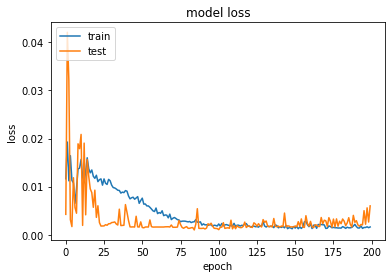

In [64]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [37]:
y_test.shape

(2476, 1)